In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
cars2 = pd.read_csv('../Data/cars2.csv', usecols = ['Year', 'Km', 'Price'],sep=';')
cars2.head()
print(cars2.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cars2[['Year','Km','Price']], cars2[['Price']], test_size=0.1, random_state=0)

from sklearn import preprocessing
X_train_norm = preprocessing.normalize(X_train, axis=0)
X_test_norm = preprocessing.normalize(X_test, axis=0)

print('X_train_norm',len(X_train_norm))

from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters = 3, random_state = 0, n_init=3)
kmeans1.fit(X_train[['Year']])
labels1=kmeans1.predict(X_train[['Year']])

kmeans2 = KMeans(n_clusters = 3, random_state = 0, n_init=3)
kmeans2.fit(X_train[['Km']])
labels2=kmeans2.predict(X_train[['Km']])

dflabels1=pd.DataFrame(labels1, columns=['class1'])
dflabels2=pd.DataFrame(labels2, columns=['class2'])

(571, 3)
X_train_norm 513


<Axes: ylabel='Price'>

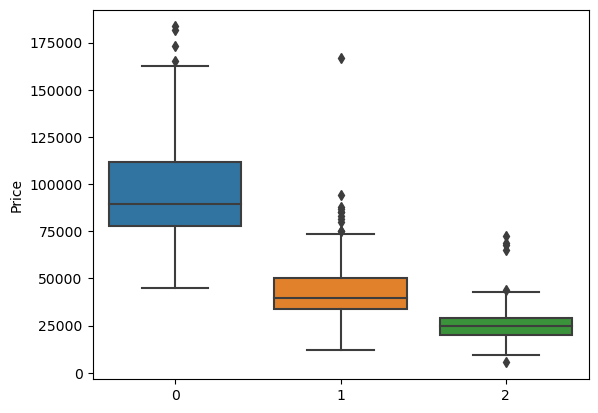

In [2]:
import seaborn as sns
sns.boxplot(x = labels1, y = y_train['Price'])

<Axes: ylabel='Price'>

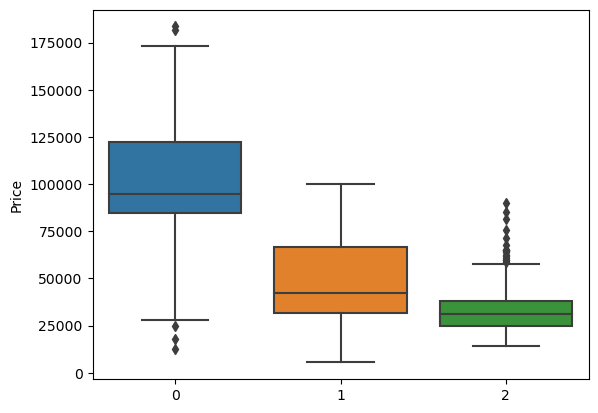

In [3]:
sns.boxplot(x = labels2, y = y_train['Price'])

In [4]:
#X_train=pd.concat([train_sp, X_train.reset_index(drop=True, inplace=True)], axis=1)
df=pd.concat([X_train.reset_index(), dflabels1.reset_index(), dflabels2], axis=1)
df
#sns.scatterplot(data = df, x = 'class', y='Price')
#df[['Price','class']]
#sns.boxplot(x = df['class'], y = df['Price'])

,index,Year,Km,Price,index,class1,class2
0,200,20,228000,32300,0,2,1
1,391,20,268000,25750,1,2,2
2,471,9,172932,65500,2,0,1
3,416,15,290000,31000,3,1,2
4,509,4,105000,80000,4,0,0
...,...,...,...,...,...,...,...
508,277,17,224000,28500,508,1,1
509,9,8,141500,71750,509,0,1
510,359,9,177000,55000,510,0,1
511,192,15,212000,31500,511,1,1


In [5]:
k=max(df['class1'])+1
print('Year')
for i in range(k):
    dfi=df['Year'][df['class1']==i]
    print(f'{i+1},  {dfi.mean():.0f}')
print('Km')
for i in range(k):
    dfi=df['Km'][df['class2']==i]
    print(f'{i+1},  {dfi.mean():.0f}')

Year
1,  6
2,  14
3,  21
Km
1,  76498
2,  187953
3,  272404


In [6]:
#X_train
#df['class']
k=max(df['class1'])+1
print('Classes ij')
for i in range(k):
    for j in range(k):
        dfij=df['Price'][(df['class1']==i) & (df['class2']==j)]
        print(f'{i+1}{j+1},  {dfij.mean():.0f}')

Classes ij
11,  107591
12,  74558
13,  68493
21,  72075
22,  45131
23,  40026
31,  34850
32,  26681
33,  24423


In [7]:
max(df['class1'])

2